# Introduction to Machine learning with Python

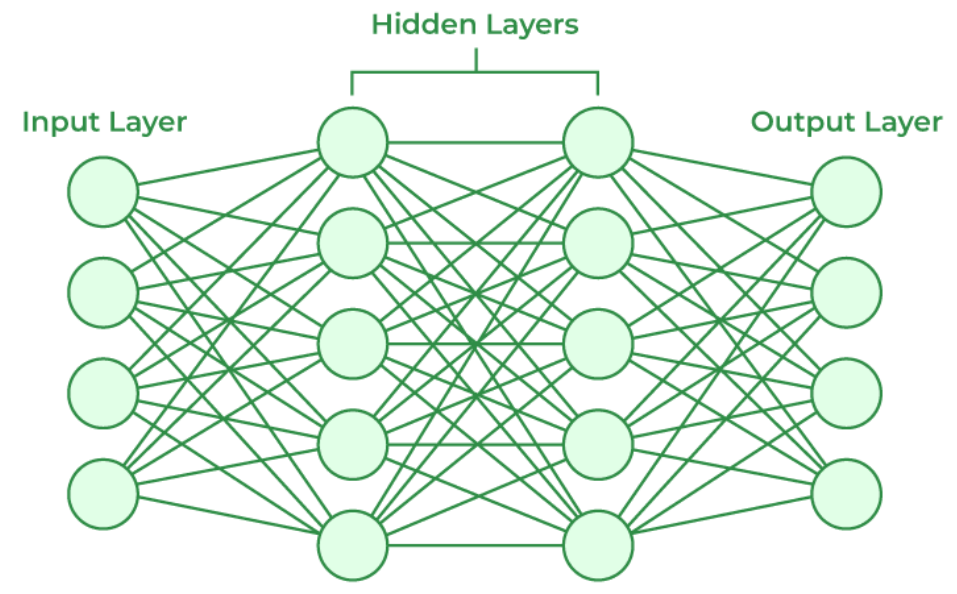

Import dataset

In [44]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/dvddepennde/crops_public_data/main/Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


<h1 style='color:blue'>Declare independent and target variables</h1>

In [45]:
X = data.drop('label', axis=1)
y = data['label']

<h1 style='color:blue'>Split dataset into training and test set</h1>

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    shuffle = True, random_state = 0)

<h1 style='color:blue'>LightGBM Model Building and Training</h1>

In [47]:
# build the lightgbm model
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1330
[LightGBM] [Info] Number of data points in the train set: 1540, number of used features: 7
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.105431
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -3.076858
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.105431
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -2.982829
[LightGBM] [Info] Start training from score -3.049078
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] 

LGBMClassifier()

<h1 style='color:blue'>Model Prediction</h1>

In [48]:
# predict the results
y_pred=model.predict(X_test)

<h1 style='color:blue'>View Accuracy</h1>

In [49]:
# view accuracy
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9894


<h1 style='color:blue'>Compare train and test set accuracy</h1>

In [50]:
y_pred_train = model.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


<h1 style='color:blue'>Check for Overfitting</h1>

In [51]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9894


<h1 style='color:blue'>Confusion-matrix</h1>

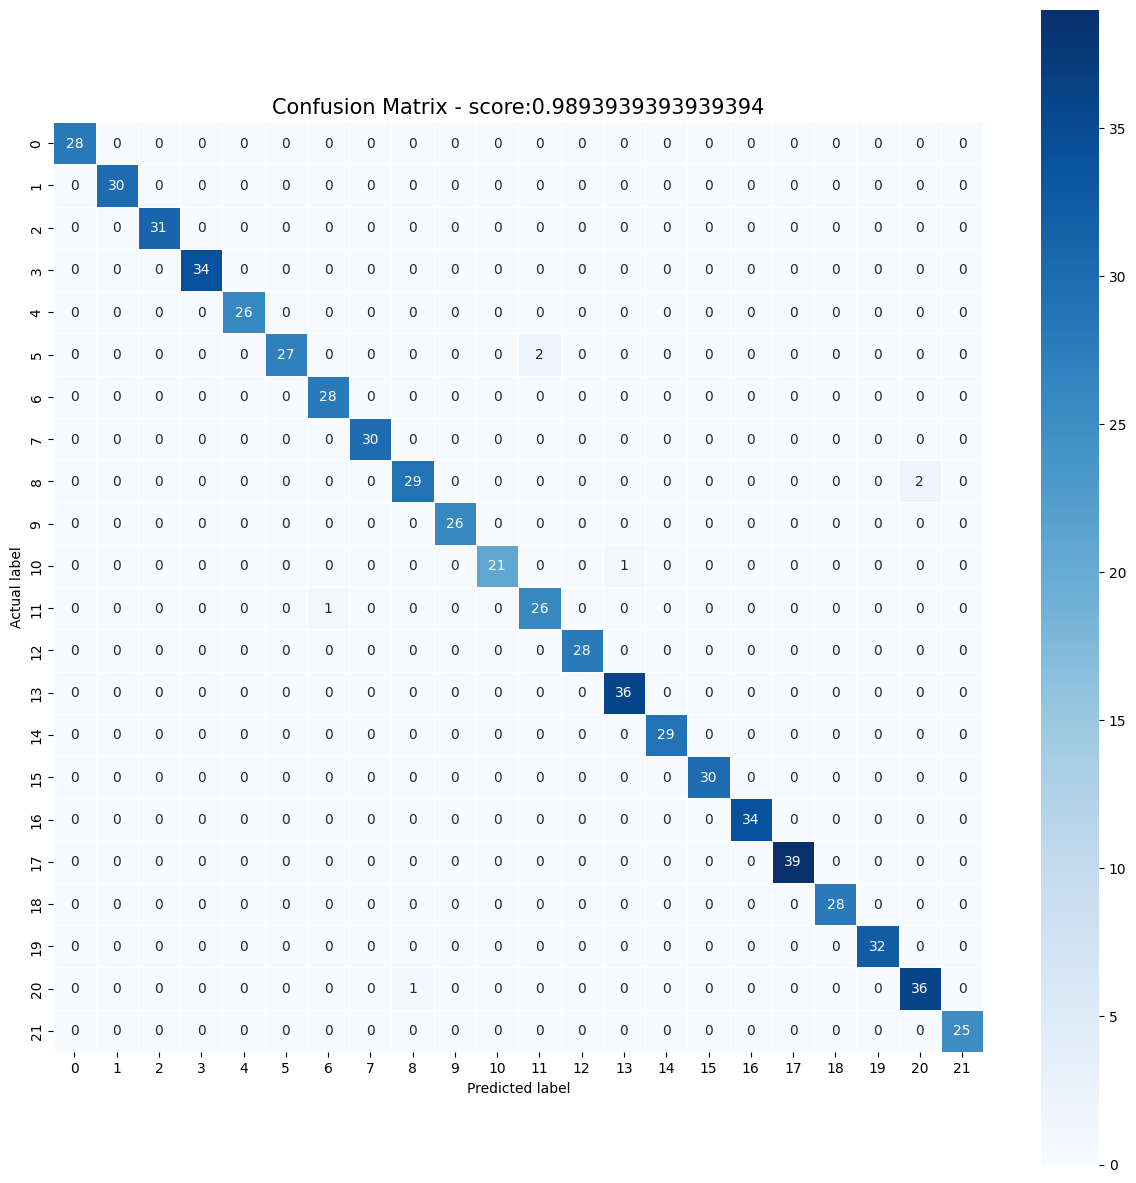

In [52]:
import matplotlib.pyplot as plt

import seaborn as sns

# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

<h1 style='color:blue'>Classification Metrices</h1>

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      0.93      0.96        29
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        30
        jute       0.97      0.94      0.95        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      0.95      0.98        22
       maize       0.93      0.96      0.95        27
       mango       1.00      1.00      1.00        28
   mothbeans       0.97      1.00      0.99        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

In [66]:
newdata=model.predict([[90, 42, 43, 20.879744, 100, 5.5,220]])
print(newdata)





['rice']
['coffee']
['kidneybeans']


In [ ]:
newdata=model.predict([[90, 42, 43, 20.879744, 0, 5.5,220]])
print(newdata)

In [ ]:
newdata=model.predict([[1, 42, 43, 20.879744, 0, 5.5,220]])
print(newdata)

# Decision Tree¶


In [35]:
acc = []
model = []

In [36]:
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,y_train)

predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  91.21212121212122
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.65      1.00      0.78        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      0.90      0.95        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       1.00      0.23      0.37        31
 kidneybeans       1.00      0.81      0.89        26
      lentil       0.88      1.00      0.94        22
       maize       0.71      0.81      0.76        27
       mango       1.00      0.93      0.96        28
   mothbeans       1.00      0.50      0.67        36
    mungbean       0.94      1.00      0.97        29
   muskmelon       0.97      1.00      0.98        30
      orange       1.00      1.00

In [37]:
X_train.shape

(1540, 7)

In [77]:
#Importamos la librería
import graphviz
from sklearn import tree

arbol = tree.DecisionTreeClassifier(criterion='entropy')

arbol = arbol.fit(X_train, y_train)


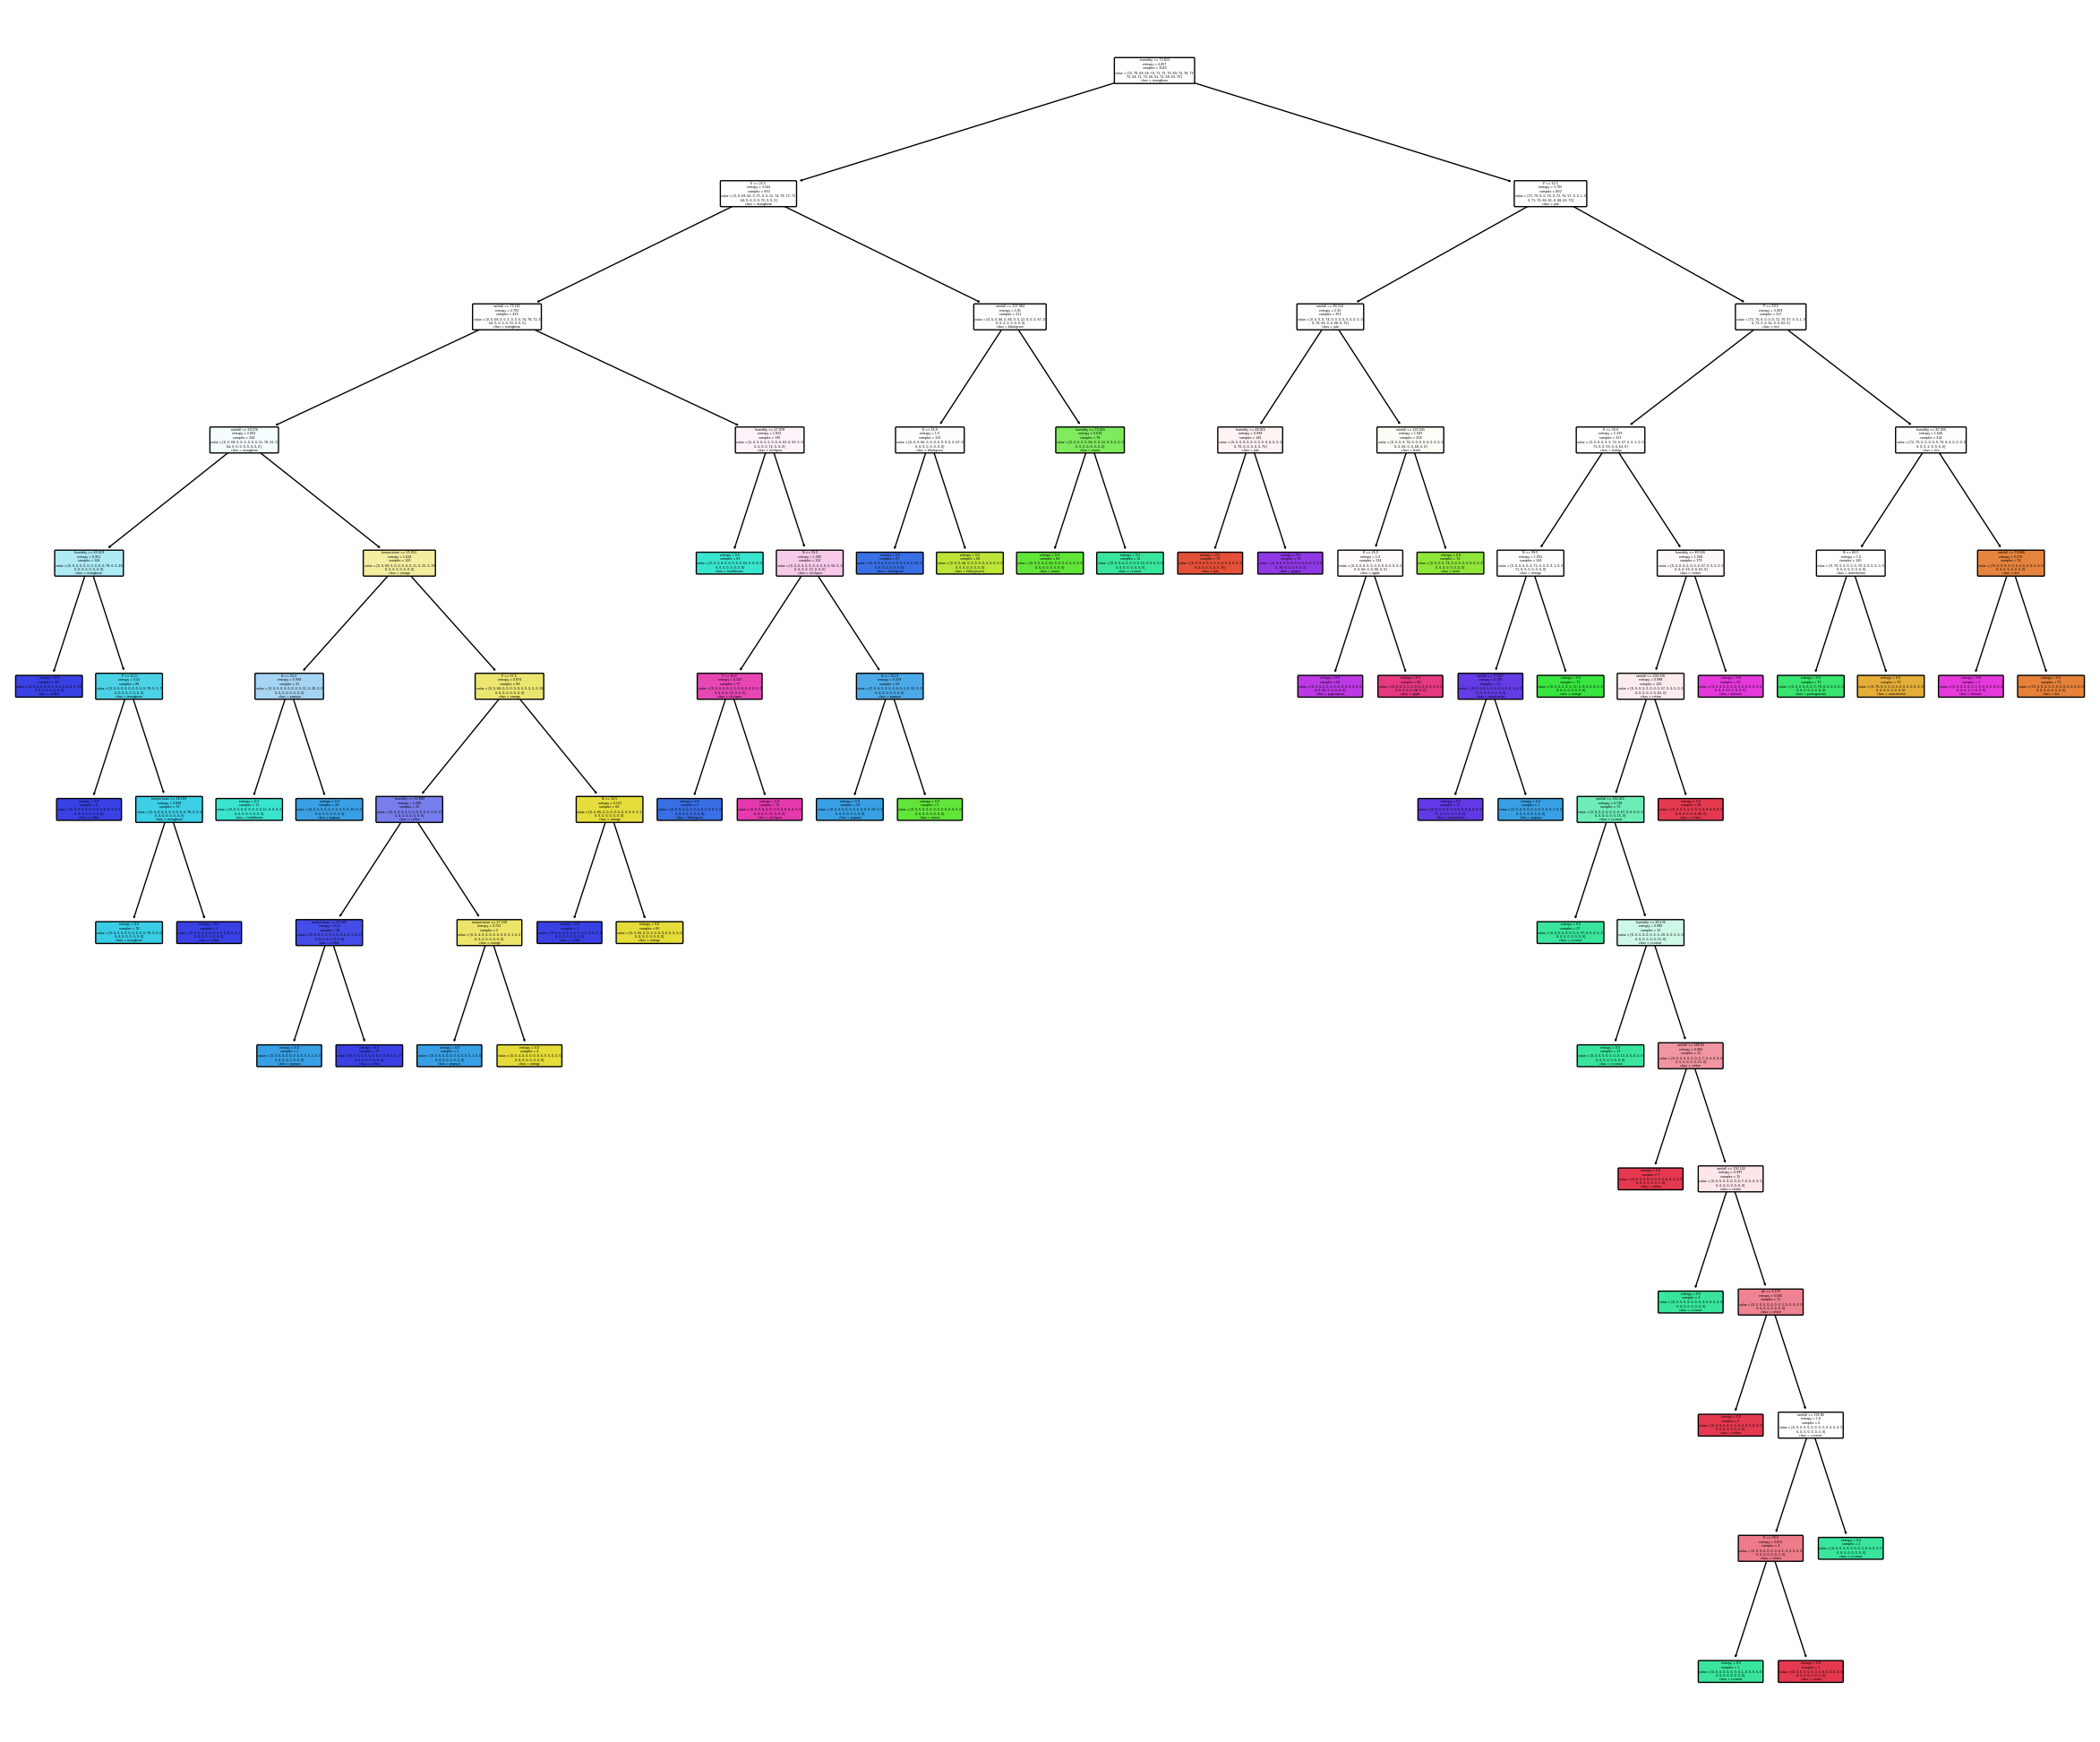

In [78]:
plt.figure(figsize=(30,25))
tree.plot_tree(arbol,
               filled = True,
               rounded = True,
               class_names =y_train.unique(),
               feature_names = X_train.columns
              )
plt.show()


In [79]:
#Importamos la librería
import graphviz
from sklearn import tree

arbol = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)

arbol = arbol.fit(X_train, y_train)



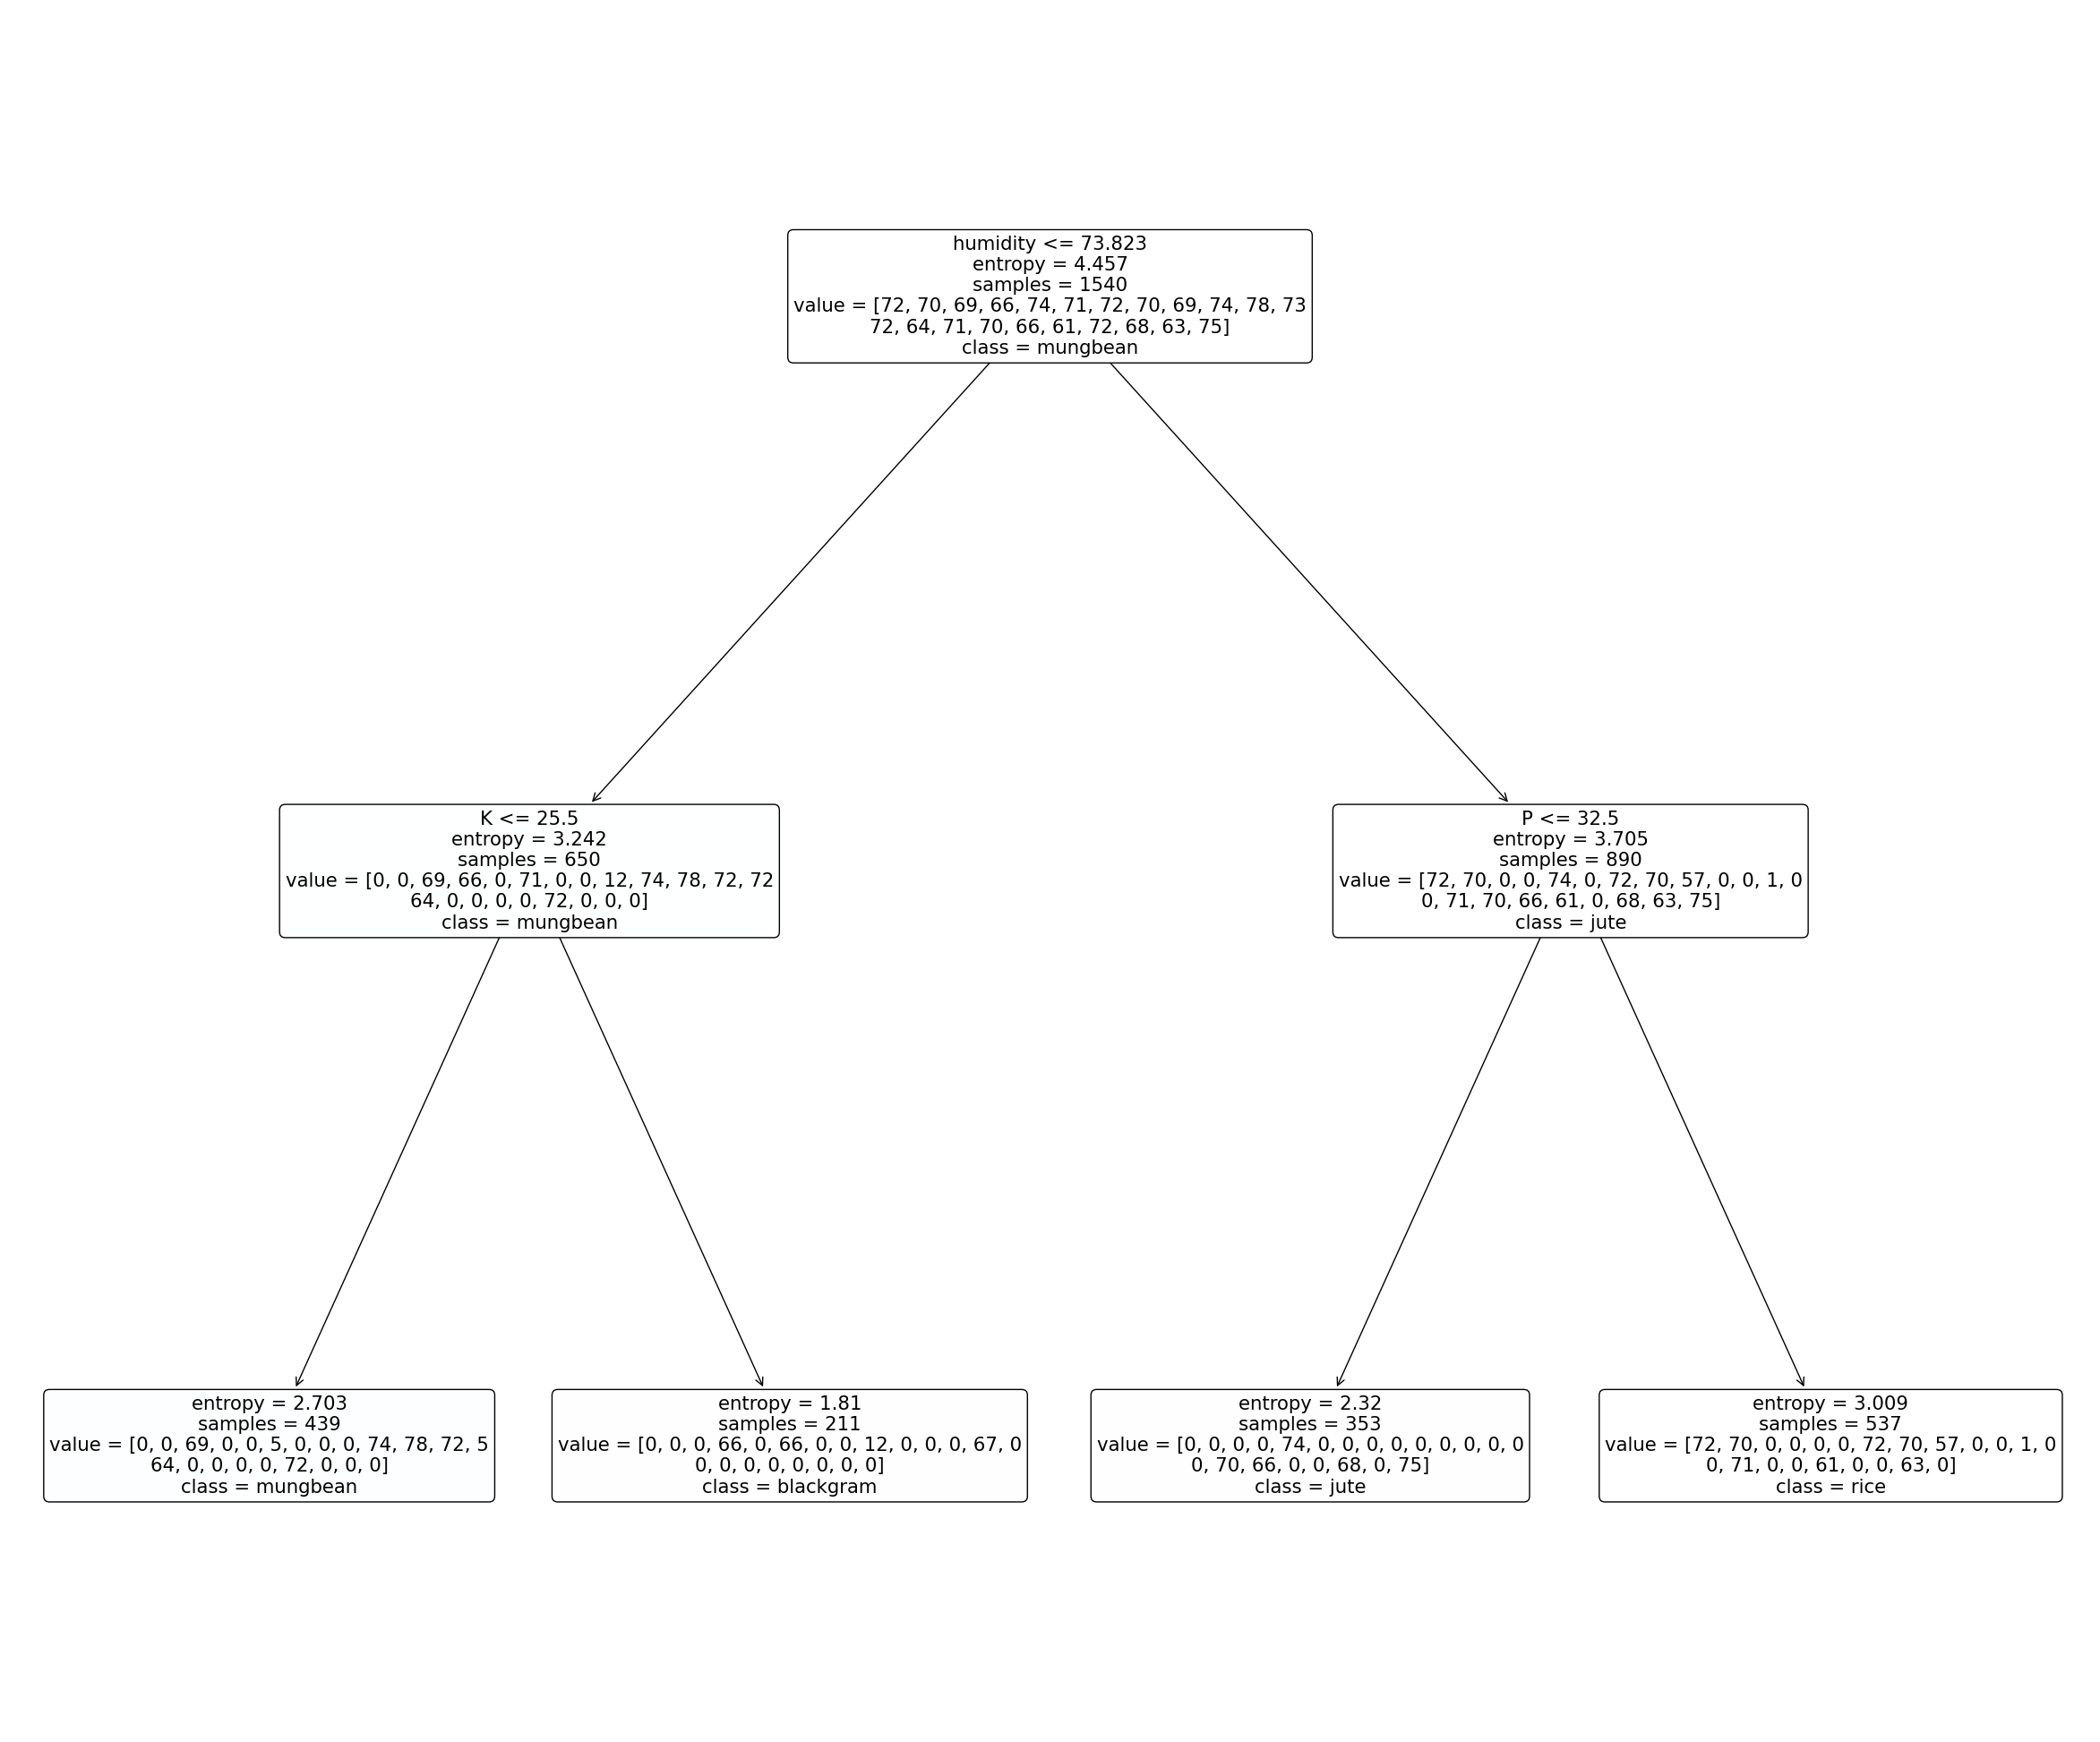

In [80]:
plt.figure(figsize=(30,25))
tree.plot_tree(arbol,
               filled = True,
               rounded = True,
               class_names =y_train.unique(),
               feature_names = X_train.columns
              )
plt.show()